# EDA Overview of German Credit Dataset

This notenook aims to understand briefly how is the distribution of features on this German Credit Dataset.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [9]:
# Change this variable to observe raw or cleaned data
data_type = "raw"  # Options: "raw" or "cleaned"

print(f"This EDA will use the {data_type} dataset.")

This EDA will use the raw dataset.


In [10]:
project_root = os.getcwd()

data_path = os.path.join(project_root, "data", data_type, "german_credit_data.csv")

if os.path.exists(data_path) and os.path.isfile(data_path):
	df = pd.read_csv(data_path)
else:
	# Try alternative paths
	alternative_paths = [
		os.path.join(project_root, "..", "data", data_type, "german_credit_data.csv"),
		os.path.join(project_root, "german_credit_data.csv"),
		os.path.join(project_root, "data", "german_credit_data.csv"),
	]
	
	for alt_path in alternative_paths:
		if os.path.exists(alt_path) and os.path.isfile(alt_path):
			print(f"Found file at: {alt_path}")
			df = pd.read_csv(alt_path)
			break
	else:
		# List contents of the data directory to help debug
		data_dir = os.path.join(project_root, "data", data_type)
		if os.path.exists(data_dir):
			print(f"Contents of {data_dir}:")
			print(os.listdir(data_dir))
		raise FileNotFoundError(f"Could not find german_credit_data.csv in any expected location")

print(f"The dataset will be cached in: {data_path}")

Found file at: /home/r-one/Documents/epita/stochastique/Prediction-Conforme-et-Regression-Quantile-sur-le-Risque-de-Credit/notebooks/../data/raw/german_credit_data.csv
The dataset will be cached in: /home/r-one/Documents/epita/stochastique/Prediction-Conforme-et-Regression-Quantile-sur-le-Risque-de-Credit/notebooks/data/raw/german_credit_data.csv


## Numerical approach

In [11]:
print("\n--- Aperçu général ---")
print(f"\nDimensions : {df.shape}")
print(f"Valeurs manquantes :\n{df.isnull().sum()}")


--- Aperçu général ---

Dimensions : (1000, 21)
Valeurs manquantes :
checking_account           0
duration_month             0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment                 0
installment_rate           0
personal_status            0
other_debtors              0
residence_since            0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
liable_people              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


In [12]:
print(df.head())

  checking_account  duration_month credit_history purpose  credit_amount  \
0              A11               6            A34     A43           1169   
1              A12              48            A32     A43           5951   
2              A14              12            A34     A46           2096   
3              A11              42            A32     A42           7882   
4              A11              24            A33     A40           4870   

  savings_account employment  installment_rate personal_status other_debtors  \
0             A65        A75                 4             A93          A101   
1             A61        A73                 2             A92          A101   
2             A61        A74                 2             A93          A101   
3             A61        A74                 2             A93          A103   
4             A61        A73                 3             A93          A101   

   ...  property age  other_installment_plans housing existing

In [13]:
target_counts = df["credit_risk"].value_counts(normalize=True)
print("\n--- Répartition de la variable cible ---")
print(target_counts)


--- Répartition de la variable cible ---
credit_risk
good    0.7
bad     0.3
Name: proportion, dtype: float64


In [19]:
print("\n--- Statistiques descriptives ---")
print(df.describe())


--- Statistiques descriptives ---
       duration_month  credit_amount  installment_rate  residence_since  \
count     1000.000000    1000.000000       1000.000000      1000.000000   
mean        20.903000    3271.258000          2.973000         2.845000   
std         12.058814    2822.736876          1.118715         1.103718   
min          4.000000     250.000000          1.000000         1.000000   
25%         12.000000    1365.500000          2.000000         2.000000   
50%         18.000000    2319.500000          3.000000         3.000000   
75%         24.000000    3972.250000          4.000000         4.000000   
max         72.000000   18424.000000          4.000000         4.000000   

               age  existing_credits  liable_people  
count  1000.000000       1000.000000    1000.000000  
mean     35.546000          1.407000       1.155000  
std      11.375469          0.577654       0.362086  
min      19.000000          1.000000       1.000000  
25%      27.000000 

## Approche graphique

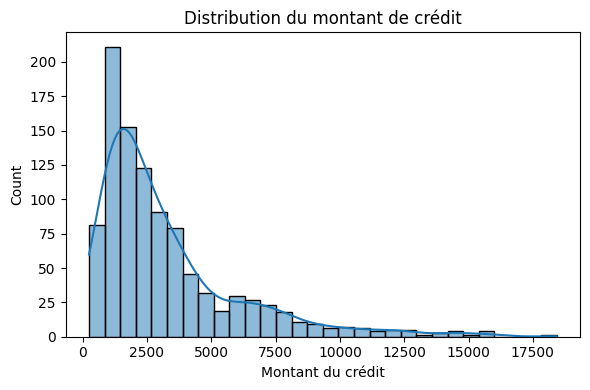

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["credit_amount"], bins=30, kde=True)
plt.title("Distribution du montant de crédit")
plt.xlabel("Montant du crédit")
plt.tight_layout()
plt.show()
plt.close()

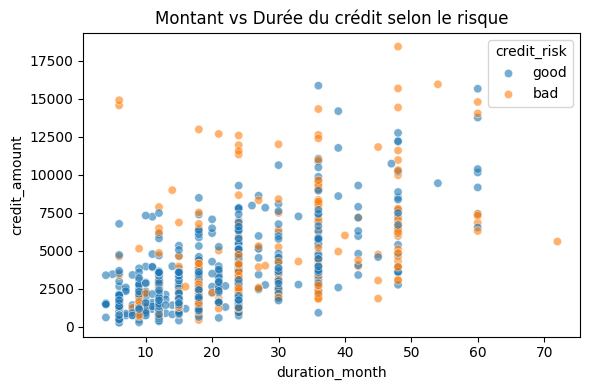

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="duration_month", y="credit_amount", hue="credit_risk", alpha=0.6)
plt.title("Montant vs Durée du crédit selon le risque")
plt.tight_layout()
plt.show()
plt.close()
